In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [3]:
df=pd.read_csv('insurance.csv')
df.head()


,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [4]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [5]:
sns.set (style="whitegrid",palette="Set2", font_scale=1.1)

In [6]:
df.duplicated().sum()
df.isna().sum()
df.shape

(1340, 10)

In [7]:
df.dropna(inplace = True)

In [8]:
df.describe(include='all')

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
count,1332.00,1332.00,1332,1332.00,1332.00,1332,1332.00,1332,1332,1332.00
unique,NaN,NaN,2,NaN,NaN,2,NaN,2,4,NaN
top,NaN,NaN,male,NaN,NaN,No,NaN,No,southeast,NaN
freq,NaN,NaN,670,NaN,NaN,695,NaN,1058,442,NaN
mean,674.47,38.09,NaN,30.66,94.19,NaN,1.10,NaN,NaN,13325.25
std,384.70,11.11,NaN,6.12,11.45,NaN,1.21,NaN,NaN,12109.62
min,1.00,18.00,NaN,16.00,80.00,NaN,0.00,NaN,NaN,1121.87
25%,341.75,29.00,NaN,26.20,86.00,NaN,0.00,NaN,NaN,4760.16
50%,674.50,38.00,NaN,30.35,92.00,NaN,1.00,NaN,NaN,9412.97
75%,1007.25,47.00,NaN,34.73,99.00,NaN,2.00,NaN,NaN,16781.33


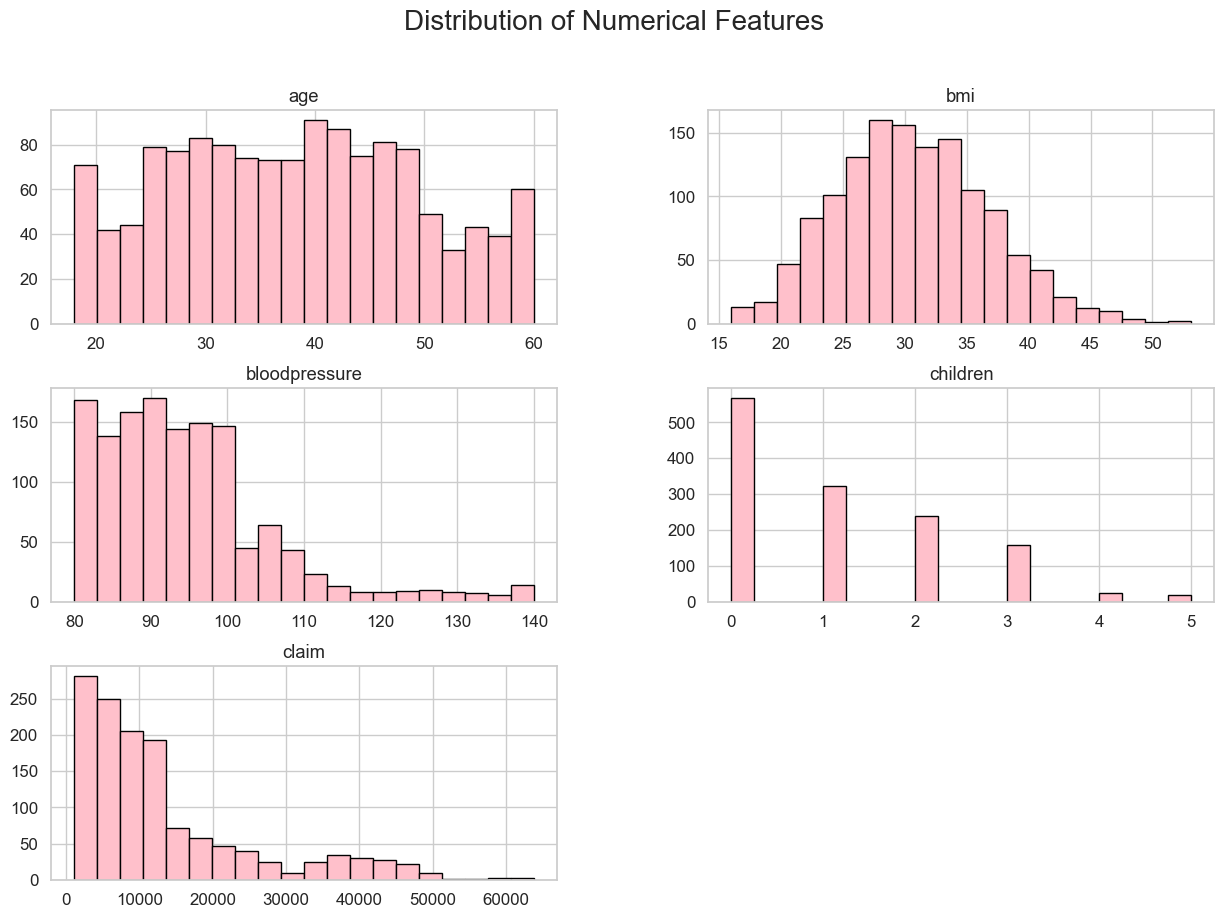

In [9]:
numeric_cols = ['age','bmi','bloodpressure','children','claim']
df[numeric_cols].hist(bins=20, figsize=(15,10),color='pink',edgecolor='black')
plt.suptitle('Distribution of Numerical Features',fontsize=20)
plt.show()


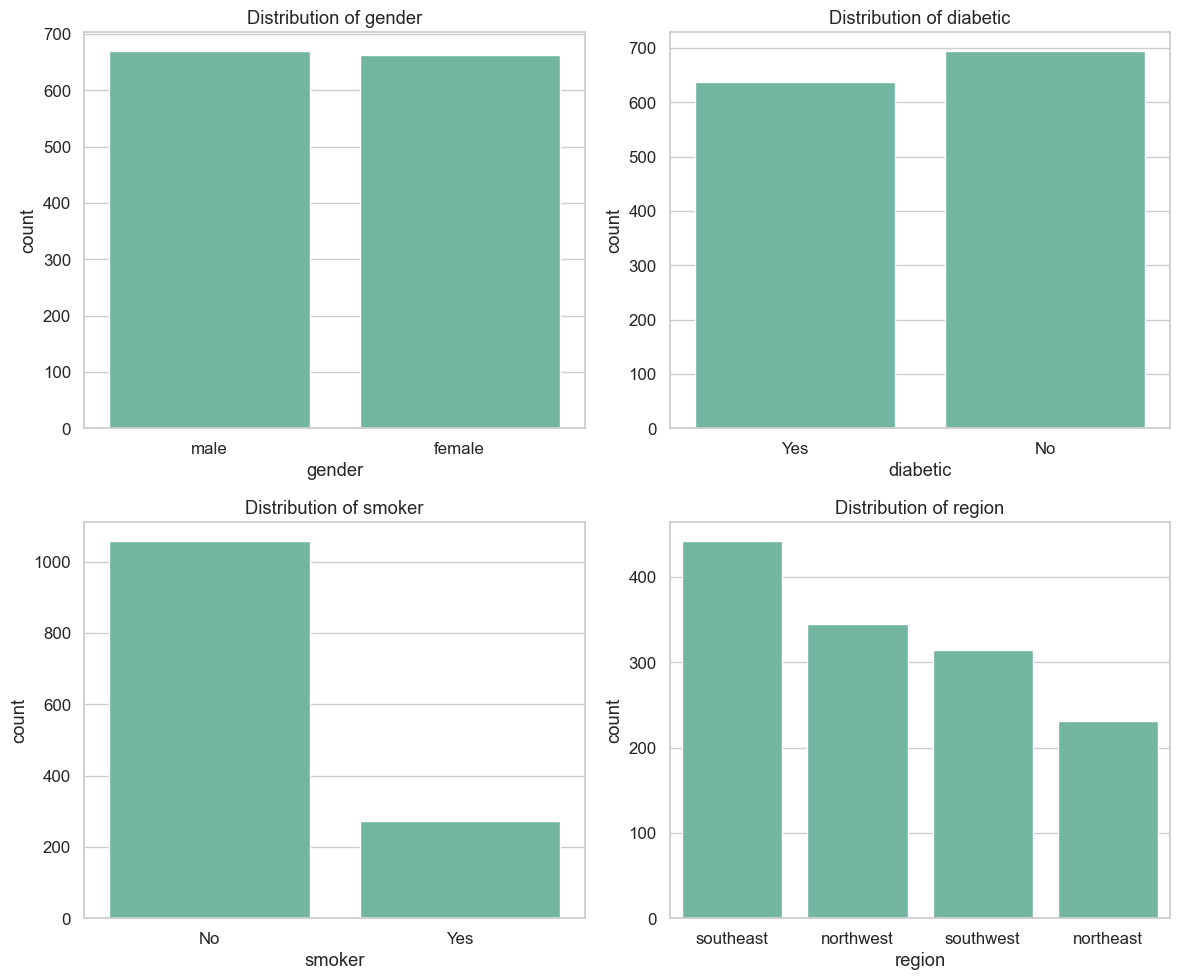

In [10]:
cato_cols =['gender','diabetic','smoker','region']

plt.figure(figsize=(12,10))

for i,col in enumerate(cato_cols,1):
  plt.subplot(2,2,i)
  sns.countplot(data= df, x=col)
  plt.title(f"Distribution of {col}")


plt.tight_layout()
plt.show()

In [11]:
df.groupby(["gender", "smoker"])["claim"].mean().round(2)

gender  smoker
female  No        8762.30
        Yes      30679.00
male    No        8169.25
        Yes      33042.01
Name: claim, dtype: float64

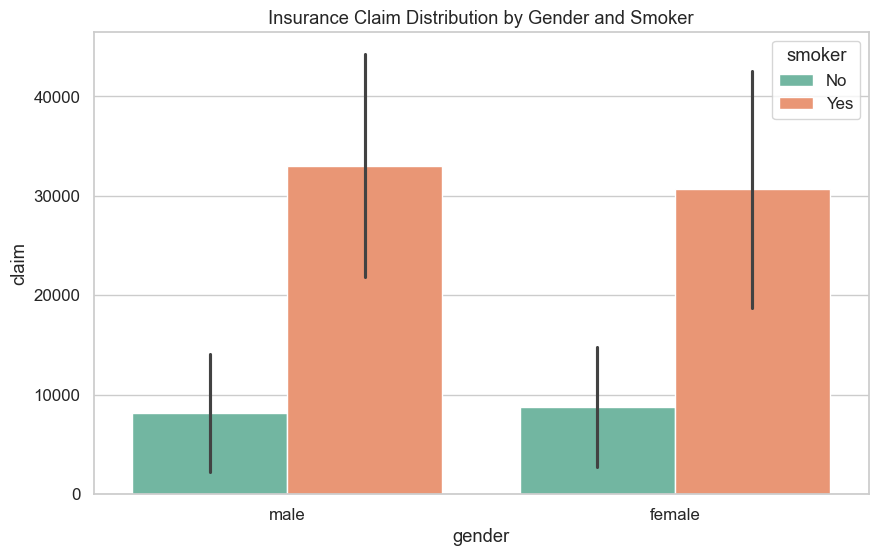

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="gender", y="claim", hue="smoker", estimator="mean", errorbar="sd")
plt.title("Insurance Claim Distribution by Gender and Smoker")
plt.show()

In [15]:
pivot_region_diabetic = df.groupby(['region', 'diabetic'])['claim'].mean().unstack()

In [16]:
pivot_region_diabetic

diabetic,No,Yes
region,,
northeast,16966.86,16818.30
northwest,11442.83,12224.96
southeast,13578.72,12574.09
southwest,13069.91,12313.74


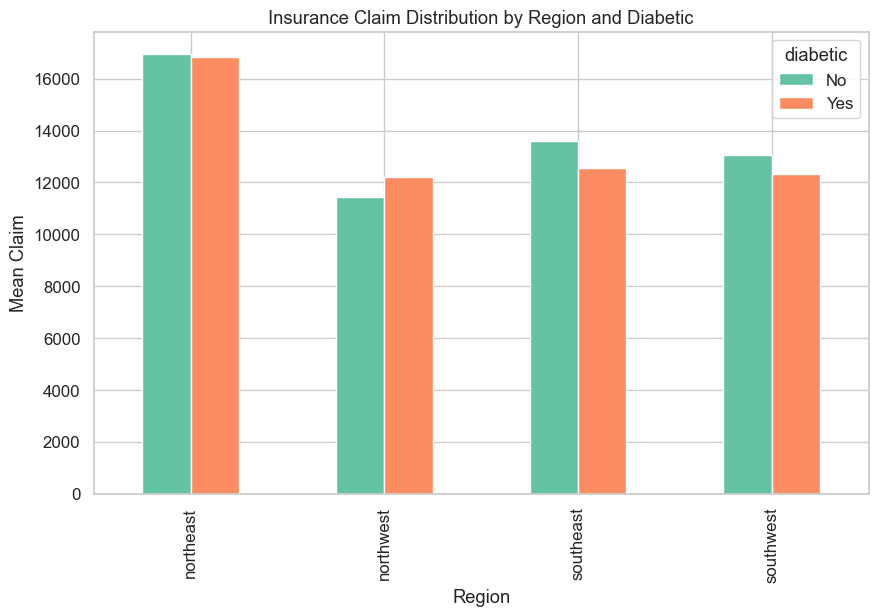

In [17]:
pivot_region_diabetic.plot(kind="bar",figsize=(10,6))
plt.title("Insurance Claim Distribution by Region and Diabetic")
plt.xlabel("Region")
plt.ylabel("Mean Claim")
plt.show()

In [18]:
pivot_table = pd.pivot_table(df, values='claim', index='region', columns='smoker', aggfunc='mean')
pivot_table

smoker,No,Yes
region,,
northeast,11666.11,29673.54
northwest,8076.20,30192.00
southeast,7444.14,34845.00
southwest,8294.75,32269.06


In [19]:
pivot_table = pd.pivot_table(df,values='claim',index='children',columns='diabetic',aggfunc='mean')
pivot_table

diabetic,No,Yes
children,,
0,12967.40,11985.29
1,12730.46,12732.06
2,15567.77,14579.36
3,13807.61,17091.26
4,14106.63,13573.35
5,8519.04,9205.59


In [20]:
numeric_cols

['age', 'bmi', 'bloodpressure', 'children', 'claim']

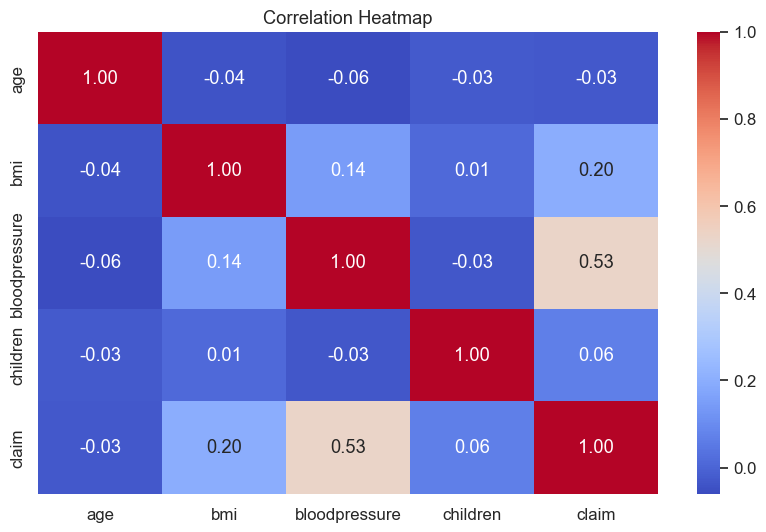

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_cols].corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()
#

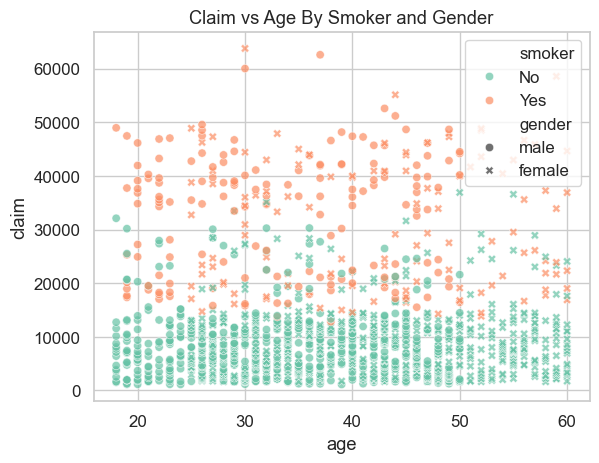

In [22]:
sns.scatterplot(data=df,x='age',y='claim',hue='smoker',style='gender',alpha = 0.7)
plt.title('Claim vs Age By Smoker and Gender')
plt.show()

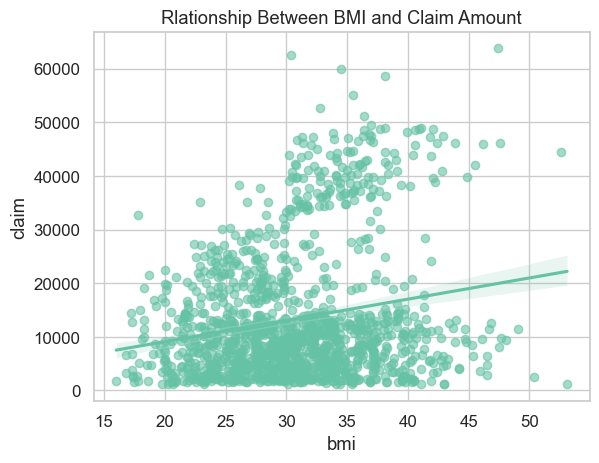

In [23]:
sns.regplot(data=df,x='bmi',y='claim',scatter_kws={'alpha':0.6})
plt.title('Claim')
plt.title('Rlationship Between BMI and Claim Amount')
plt.show()
#

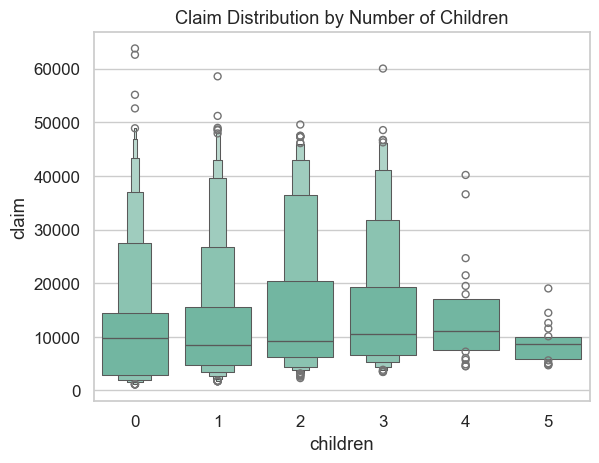

In [24]:
sns.boxenplot(data=df,x='children',y='claim')
plt.title('Claim Distribution by Number of Children')
plt.show()


In [25]:
df['age_group']= pd.cut(df['age'], bins = [0,18,28,45,60,100],labels=['<18','18-28','28-45','46-60','60+'])


In [26]:
df['age_group'].value_counts()

age_group
28-45    636
46-60    383
18-28    297
<18       16
60+        0
Name: count, dtype: int64

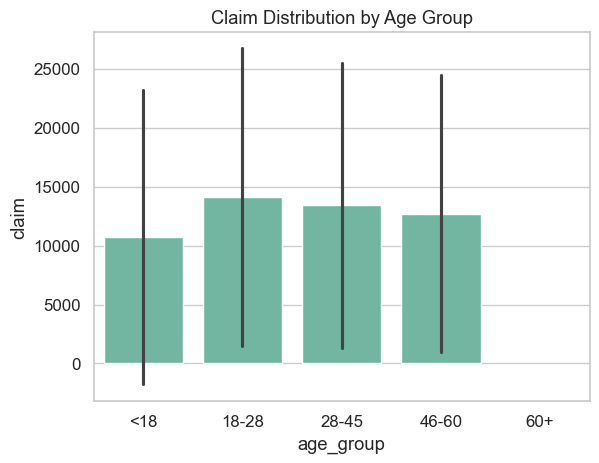

In [27]:
sns.barplot(data=df,x='age_group',y='claim',estimator='mean',errorbar='sd')
plt.title('Claim Distribution by Age Group')
plt.show()
#

In [28]:
df['bmi_category']=pd.cut(df['bmi'],bins=[0,18.5,24.9,29.9,100], labels=['Underweight','Normal','Overweight','Obese'])


In [29]:
df['bmi_category'].value_counts()

bmi_category
Obese          702
Overweight     387
Normal         222
Underweight     21
Name: count, dtype: int64

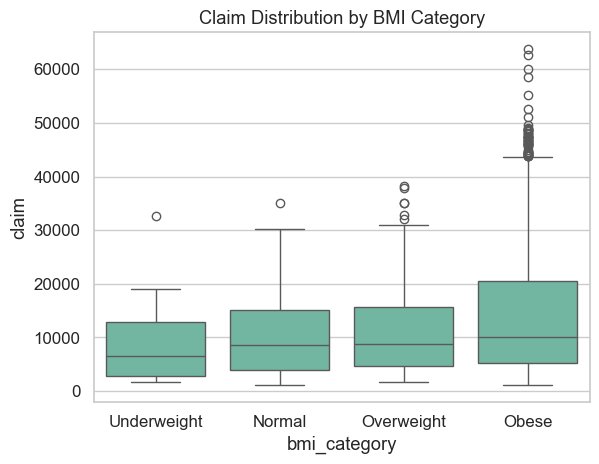

In [30]:
sns.boxplot(data = df,x='bmi_category',y='claim')
plt.title('Claim Distribution by BMI Category')
plt.show()
#


In [31]:
regions_stats = df.groupby('region').agg(
    smoker_rate  = ('smoker', lambda x: (x== 'yes').mean()* 100),
    avg_claim    = ('claim', 'mean')
).reset_index()

In [33]:
regions_stats

,region,smoker_rate,avg_claim
0,northeast,0.00,16889.04
1,northwest,0.00,11794.22
2,southeast,0.00,13085.50
3,southwest,0.00,12723.13


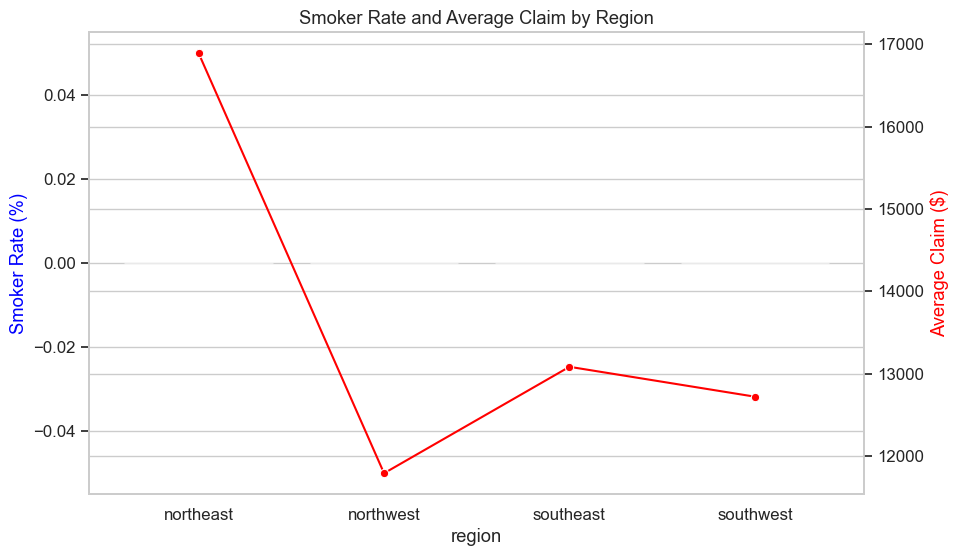

In [34]:
fig, ax1 = plt.subplots(figsize=(10,6))
sns.barplot(data = regions_stats, x='region',y='smoker_rate',color='blue',ax=ax1, alpha = 0.6)
ax2= ax1.twinx()
sns.lineplot(data=regions_stats,x='region',y='avg_claim',color='red',ax=ax2,marker='o')
ax1.set_ylabel('Smoker Rate (%)',color='blue')
ax2.set_ylabel('Average Claim ($)',color='red')
plt.title('Smoker Rate and Average Claim by Region')
plt.show()

In [35]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
import joblib


In [36]:
X= df[['age','gender','bmi','children','bloodpressure','smoker',"diabetic"]]
y=df['claim']

In [37]:
categorical_cols = ['gender','smoker','diabetic']
label_encoder = LabelEncoder={}

In [38]:
from sklearn.preprocessing import LabelEncoder
import joblib

categorical_cols = ['gender', 'smoker', 'diabetic']
label_encoder = {}

for col in categorical_cols:
    encoder_instance = LabelEncoder()
    X[col] = encoder_instance.fit_transform(X[col])
    label_encoder[col] = encoder_instance
    joblib.dump(encoder_instance, f'label_encoder_{col}.pkl')


C:\Users\farey\AppData\Local\Temp\ipykernel_26192\626488428.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = encoder_instance.fit_transform(X[col])
C:\Users\farey\AppData\Local\Temp\ipykernel_26192\626488428.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = encoder_instance.fit_transform(X[col])
C:\Users\farey\AppData\Local\Temp\ipykernel_26192\626488428.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [39]:
label_encoder

{'gender': LabelEncoder(),
 'smoker': LabelEncoder(),
 'diabetic': LabelEncoder()}

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [41]:
numeric_cols=['age','bmi','children','bloodpressure']
scaler = StandardScaler()

In [42]:
X_train[numeric_cols]= scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols]= scaler.transform(X_test[numeric_cols])

In [43]:
joblib.dump(scaler,'scaler.pkl')

['scaler.pkl']

In [44]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)
#

(1065, 7) (1065,)
(267, 7) (267,)


In [45]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from xgboost import XGBRegressor

In [46]:
def evaluate_model(model,X_train,X_test,y_train,y_test):
  y_pred_train = model.predict(X_train)
  r2 = r2_score(y_test,y_pred_train)
  mae = mean_absolute_error(y_test,y_pred_train)
  rmse = np.sqrt(mean_squared_error(y_test,y_pred_train))
  return{'R2':r2,'MAE':mae,'RMSE':rmse}

In [47]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    return {'R2 Score': r2, 'RMSE': rmse}


In [48]:
results = {}

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from xgboost import XGBRegressor
import numpy as np

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
results['Linear Regression'] = evaluate_model(lr, X_train, X_test, y_train, y_test)
print("Linear Regression")

# Polynomial Regression
best_poly_model = None
best_poly_score = -np.inf

for degree in [2, 3]:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    lr_poly = LinearRegression()
    lr_poly.fit(X_train_poly, y_train)

    poly_score = lr_poly.score(X_test_poly, y_test)

    if poly_score > best_poly_score:
        best_poly_score = poly_score
        best_poly_model = (degree, poly, lr_poly)

degree, poly, lr_poly = best_poly_model
results[f'Polynomial Regression (degree {degree})'] = evaluate_model(
    lr_poly,
    poly.fit_transform(X_train),
    poly.transform(X_test),
    y_train,
    y_test
)
print("Polynomial Regression")

# ✅ Random Forest Regressor (fixed)
rf = RandomForestRegressor(random_state=42)

rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_grid = GridSearchCV(rf, rf_params, cv=3, scoring='r2', n_jobs=-1, verbose=0)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
results['Random Forest'] = evaluate_model(best_rf, X_train, X_test, y_train, y_test)
print("Random Forest training completed. Best params:", rf_grid.best_params_)

# SVR
svr = SVR()

svr_params = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [1, 10, 50],
    'epsilon': [0.1, 0.2, 0.5],
    'degree': [2, 3]
}

svr_grid = GridSearchCV(svr, svr_params, cv=3, scoring='r2', n_jobs=-1, verbose=0)
svr_grid.fit(X_train, y_train)
best_svr = svr_grid.best_estimator_
results['SVR'] = evaluate_model(best_svr, X_train, X_test, y_train, y_test)
print("SVR training completed. Best params:", svr_grid.best_params_)

# XGBoost
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

xgb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

xgb_grid = GridSearchCV(xgb, xgb_params, cv=3, scoring='r2', n_jobs=-1, verbose=0)
xgb_grid.fit(X_train, y_train)
best_xgb = xgb_grid.best_estimator_
results['XGBoost'] = evaluate_model(best_xgb, X_train, X_test, y_train, y_test)
print("XGBoost training completed. Best params:", xgb_grid.best_params_)


Linear Regression
Polynomial Regression
Random Forest training completed. Best params: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
SVR training completed. Best params: {'C': 50, 'degree': 2, 'epsilon': 0.5, 'kernel': 'linear'}
XGBoost training completed. Best params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


In [50]:
results_df = pd.DataFrame(results).T.sort_values(by = 'R2 Score', ascending= False)
results_df


,R2 Score,RMSE
Random Forest,0.82,5110.60
XGBoost,0.82,5136.04
Polynomial Regression (degree 2),0.79,5535.76
Linear Regression,0.69,6655.20
SVR,0.50,8495.82


In [53]:
best_r2 = results_df["R2 Score"].max()

In [54]:
best_r2

0.8194903885803623

In [55]:
top_model = results_df[results_df['R2 Score']==best_r2]

In [56]:
top_model

,R2 Score,RMSE
Random Forest,0.82,5110.60


In [62]:
best_model = models[top_model.index[0]]

In [61]:
models ={
    "Linear Regression":lr,
    "polynomial Regression":lr_poly,
    "Random Forest":best_rf,
    "SVR":best_svr,
    "XGBoost":best_xgb
}

In [63]:
best_model

RandomForestRegressor(max_depth=5, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=200, random_state=42)

In [64]:
joblib.dump(best_model,'best_model.pkl')
print(f"Best model selected:{top_model.index[0]}")

Best model selected:Random Forest
